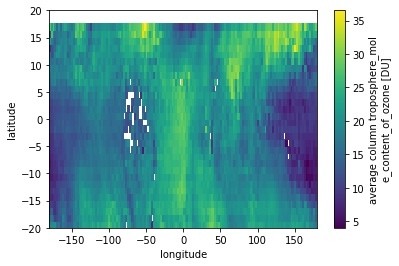

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
from matplotlib import pyplot as plt

data=xr.open_dataset("../AC-SAF_O3/GOME_O3tropo_Tropics_201804_METOPB_DLR_v1.1.nc")
prod=xr.open_dataset("../AC-SAF_O3/GOME_O3tropo_Tropics_201804_METOPB_DLR_v1.1.nc", group="PRODUCT")

# Should read it again and associate the array to the data
data["tropospheric_O3"]=prod.tropospheric_O3

# Make a basic plot of what is in the data field
%matplotlib inline
data.tropospheric_O3.plot()

Xarray make already a nice plot using the attributes of the datasets - coordinates and units. Now we can make a slightly more advanced plot using the projections - continents - coastlines. Many great hints can be found in 
http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html

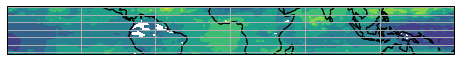

In [2]:
fig=plt.figure(figsize=(8,16))
#fig.set_dpi(400)
spl=plt.axes(projection=ccrs.PlateCarree())
spl.coastlines()
spl.gridlines()
#plt.contour(data.tropospheric_O3.longitude,data.tropospheric_O3.latitude,data.tropospheric_O3,100,
#            transform=ccrs.PlateCarree(),)

plt.contourf(data.tropospheric_O3.longitude,data.tropospheric_O3.latitude,data.tropospheric_O3)
spl.coastlines()
spl.gridlines()
#plt.colorbar()

#plt_data=data.sel({"latitude": slice(30,70),"longitude": slice(-20,30)})

## Concatenate 

Now we turn on concatenating datasets, or in our case create a larger array composed by fields at different times. The way to do this is through the 

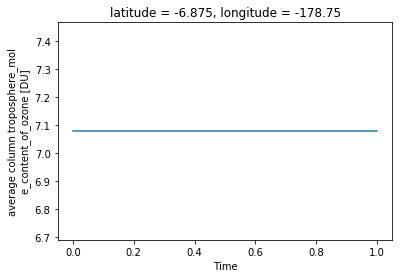

In [23]:
a=xr.concat([data.tropospheric_O3,data.tropospheric_O3], pd.Index([0,1],name='Time'))
a[:,10,0].plot.line()